In [8]:
import pandas as pd
df = pd.read_csv("C://Users//VARSHINI//Downloads//US_Accidents_March23.csv")
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [15]:
# Dataset overview
df.info()

# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [17]:
# Show missing values count
df.isnull().sum().sort_values(ascending=False)


End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [19]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows where Weather_Condition or Start_Time is missing
df.dropna(subset=['Weather_Condition', 'Start_Time'], inplace=True)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [25]:
# Convert to datetime, handle messy formats
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Drop rows where conversion failed
df.dropna(subset=['Start_Time'], inplace=True)

# Extract useful time features
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()


C:\Users\VARSHINI\AppData\Local\Temp\ipykernel_14008\930578230.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='plasma')


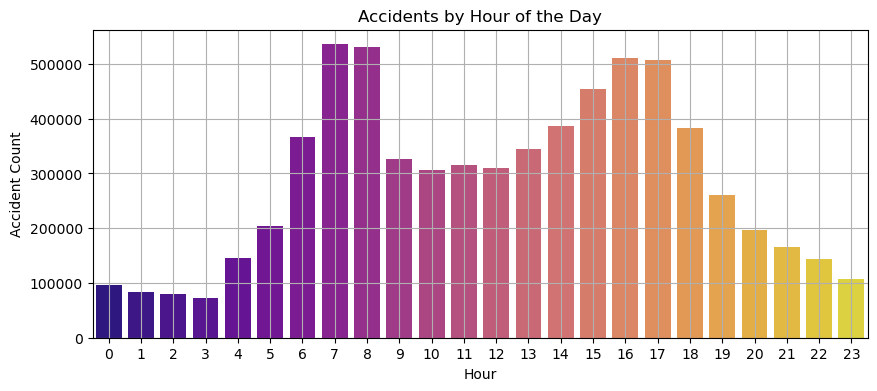

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.countplot(x='Hour', data=df, palette='plasma')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()


C:\Users\VARSHINI\AppData\Local\Temp\ipykernel_14008\2633721623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


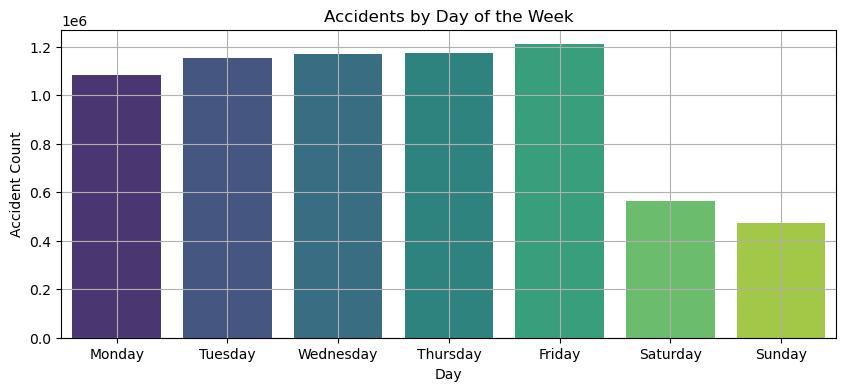

In [29]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()


C:\Users\VARSHINI\AppData\Local\Temp\ipykernel_14008\2820565138.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, order=month_order, palette='cubehelix')


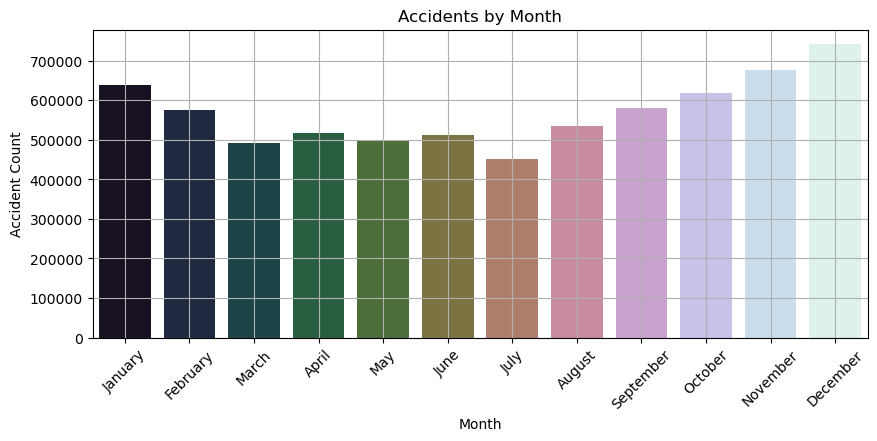

In [31]:
plt.figure(figsize=(10, 4))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.countplot(x='Month', data=df, order=month_order, palette='cubehelix')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


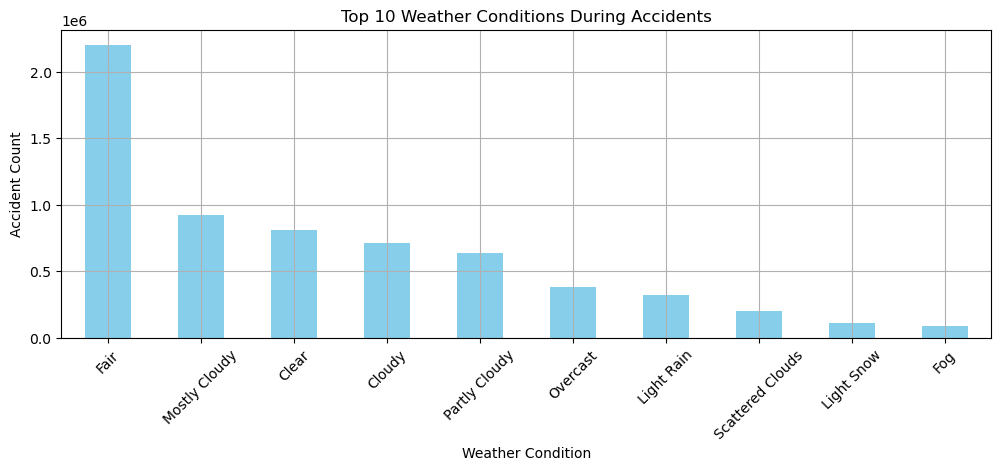

In [33]:
plt.figure(figsize=(12, 4))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


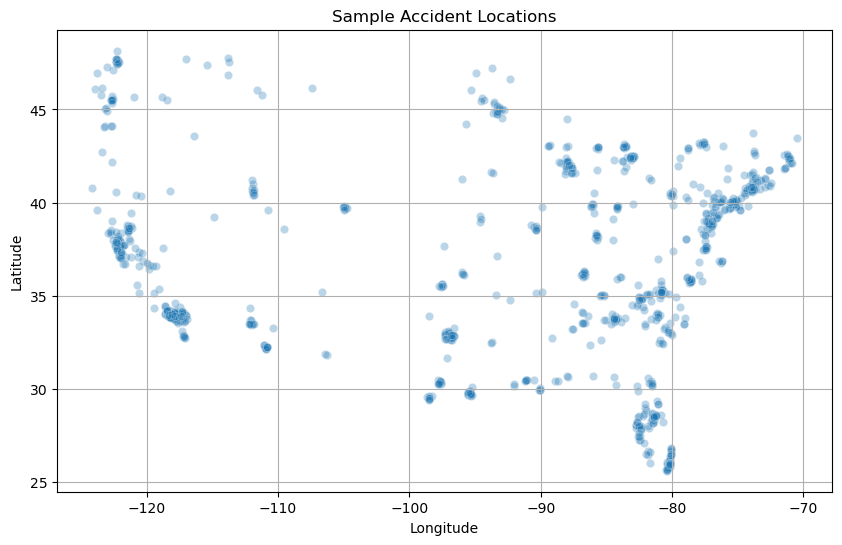

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(1000), x='Start_Lng', y='Start_Lat', alpha=0.3)
plt.title('Sample Accident Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


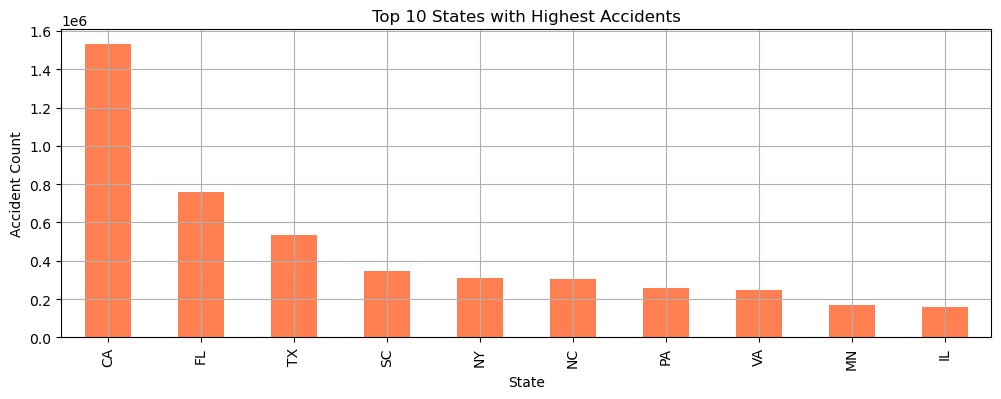

In [37]:
plt.figure(figsize=(12, 4))
df['State'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 States with Highest Accidents')
plt.xlabel('State')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()
